<a href="https://colab.research.google.com/github/KIJOONG1127/data_anal/blob/main/ch05_line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import gdown
gdown.download("https://bit.ly/3pK7iuu", "ns_book7.csv", quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 207MB/s]


'ns_book7.csv'

In [4]:
import pandas as pd
ns_book7 = pd.read_csv("ns_book7.csv", low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [5]:
# 발행년도 별 발간 도서의 갯수 k=발행년도, v = 갯수
count_by_year = ns_book7["발행년도"].value_counts()
count_by_year

,count
발행년도,
2012,18601
2014,17797
2009,17611
2011,17523
2010,17503
...,...
2548,1
1948,1
1967,1


In [6]:
# 타입 출력 - pandas.core.series.Series : 데이터프레임의 테이블 구조형식
#print(type(count_by_year))
# 인덱스로 정렬시킨다.
count_by_year = count_by_year.sort_index()
count_by_year

,count
발행년도,
1947,1
1948,1
1949,1
1952,11
1954,1
...,...
2551,1
2552,2
2559,1


In [8]:
count_by_year = count_by_year[count_by_year.index <= 2025]
count_by_year

,count
발행년도,
1947,1
1948,1
1949,1
1952,11
1954,1
...,...
2018,16423
2019,15220
2020,11834


In [9]:
ns_book7.head(2)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [22]:
# no - 분류번호 분류명
import numpy as np
def kdc_1st_char(no):
  # 000 총분류 ~ 900 역사 -> 맨 앞자리가 큰분류에 해당된다.
  # https://ko.wikipedia.org/wiki/한국십진분류법 - 참고
  if no is np.nan:
    return "-1"
  else:
    # no 문자열이 아니면 문자열로 바꾼다.
    return no [0] # 큰분류에 해당되는 맨 앞자리 데이터

count_by_subject = ns_book7["주제분류번호"].apply(kdc_1st_char).value_counts()
count_by_subject

,count
주제분류번호,
8,108643
3,80767
5,40916
9,26375
6,25070
1,22647
-1,16978
7,15836
4,13688


In [11]:
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100

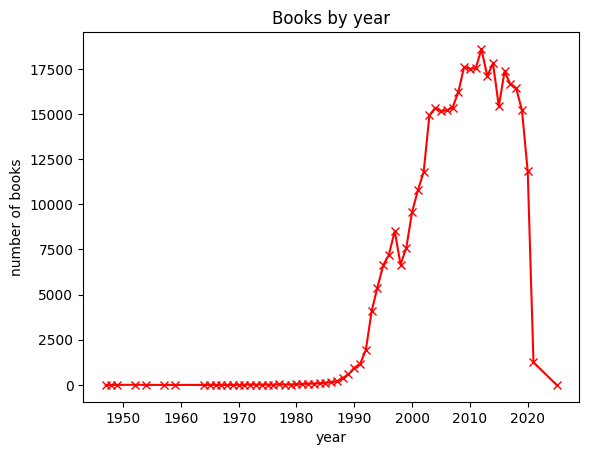

In [12]:
# plot() - 선 그래프
# plt.plot(count_by_year.index, count_by_year.values) # 기본 선 그래프
# marker="." : 없음 -> ., linestyle=":" : 실선 -> 점선, color="색상" : 색상이름, 색상표 16진수
# plt.plot(count_by_year, marker=".", linestyle=":", color="red")
# linestyle - 기본은 실선 "-", 점선 ":"
plt.plot(count_by_year, "x-r")
plt.title("Books by year")
plt.xlabel("year")
plt.ylabel("number of books")
plt.show()

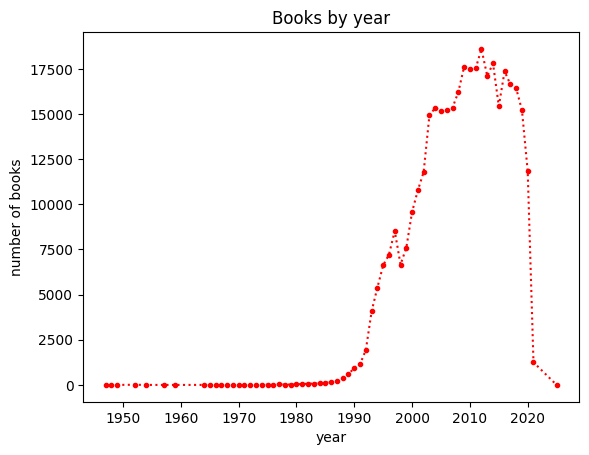

In [13]:
plt.plot(count_by_year, marker=".", linestyle=":", color="red")
plt.title("Books by year")
plt.xlabel("year")
plt.ylabel("number of books")
plt.show()

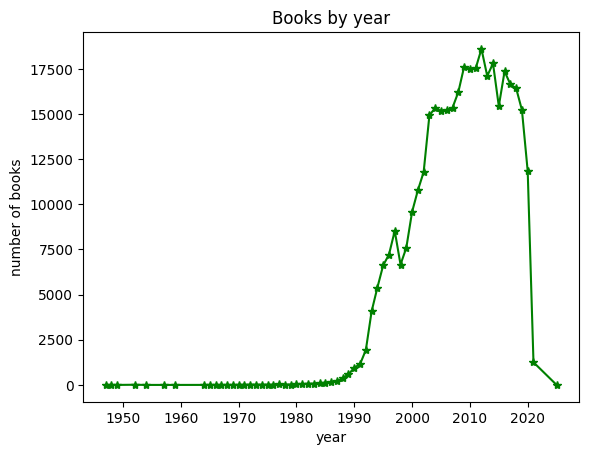

In [14]:
plt.plot(count_by_year,"*-g")
plt.title("Books by year")
plt.xlabel("year")
plt.ylabel("number of books")
plt.show()

In [15]:
ns_book7["주제분류번호"].dropna().astype(str).str.len().max()

12

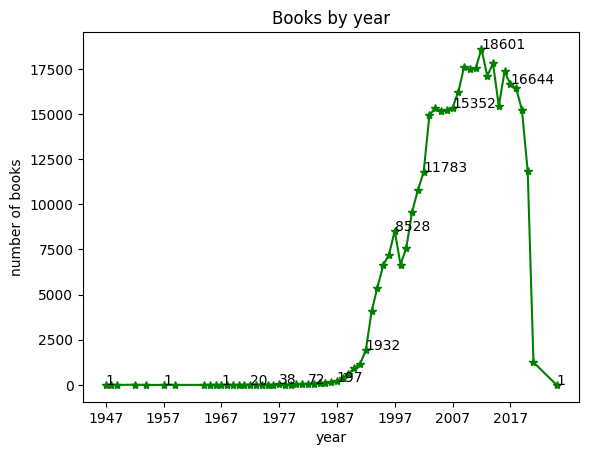

In [16]:
# plot() - 선 그래프
# plt.plot(count_by_year.index, count_by_year.values) # 기본 선 그래프
# marker="." : 없음 -> ., linestyle=":" : 실선 -> 점선, color="색상" : 색상이름, 색상표 16진수
# plt.plot(count_by_year, marker=".", linestyle=":", color="red")
# linestyle - 기본은 실선 "-", 점선 ":"
plt.plot(count_by_year, "*-g")
plt.title("Books by year")
plt.xlabel("year")
plt.ylabel("number of books")
plt.xticks(range(1947, 2025, 10))
# count_by_year[::5] - 부분 데이터 프레임 시작:끝:step - 시작부분 맨 처음이면 생략. 끝부분이 맨 마지막이면 생략한다.
# ::5 - 5 개를 건너 띄어서 표시
for idx, val in count_by_year[::5].items():
  # annotate(데이터, (위치)) - 그래프 안에 값을 표시할 때 사용 함수
  plt.annotate(val,(idx,val))
plt.show()

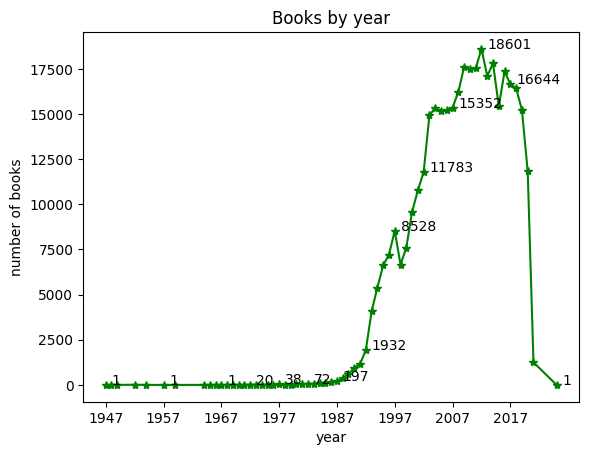

In [17]:
# plot() - 선 그래프
# plt.plot(count_by_year.index, count_by_year.values) # 기본 선 그래프
# marker="." : 없음 -> ., linestyle=":" : 실선 -> 점선, color="색상" : 색상이름, 색상표 16진수
# plt.plot(count_by_year, marker=".", linestyle=":", color="red")
# linestyle - 기본은 실선 "-", 점선 ":"
plt.plot(count_by_year, "*-g")
plt.title("Books by year")
plt.xlabel("year")
plt.ylabel("number of books")
plt.xticks(range(1947, 2025, 10))
for idx, val in count_by_year[::5].items():
  # annotate(데이터, (위치)) - 그래프 안에 값을 표시할 때 사용 함수
  plt.annotate(val,(idx,val), xytext=(idx+1, val+10))
plt.show()

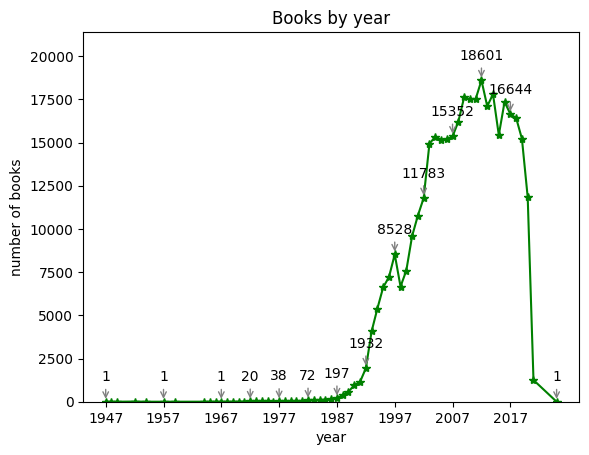

In [18]:
# plot() - 선 그래프
# plt.plot(count_by_year.index, count_by_year.values) # 기본 선 그래프
# marker="." : 없음 -> ., linestyle=":" : 실선 -> 점선, color="색상" : 색상이름, 색상표 16진수
# plt.plot(count_by_year, marker=".", linestyle=":", color="red")
# linestyle - 기본은 실선 "-", 점선 ":"
plt.plot(count_by_year, "*-g")
plt.title("Books by year")
plt.xlabel("year")
plt.ylabel("number of books")
# y 축의 데이터 범위 늘리기
plt.ylim(0, count_by_year.values.max() * 1.15)
plt.xticks(range(1947, 2025, 10))
# count_by_year[::5] - 부분 데이터 프레임 시작:끝:step - 시작부분 맨 처음이면 생략. 끝부분이 맨 마지막이면 생략한다.
# ::5 - 5 개를 건너 띄어서 표시
for idx, val in count_by_year[::5].items():
  # annotate(데이터, (위치)) - 그래프 안에 값을 표시할 때 사용 함수
  # xttext=(2, 2) - x축으로 2pt y축으로 2pt 떨어 뜨려서 표시한다.
  plt.annotate(val, (idx,val), xytext=(0, 15), textcoords="offset points",
               # 화살표와 데이터 가운데 자동 설정
               ha="center", arrowprops=dict(arrowstyle="->", color="gray"))
plt.show()

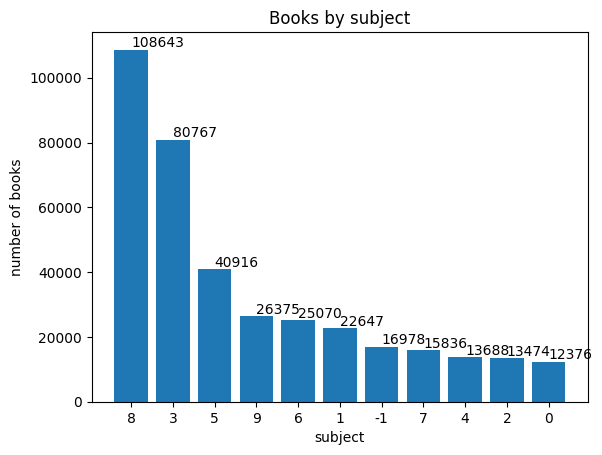

In [19]:
# 막대 그래프 그리기
# plt.그래프타입함수(x축의 데이터, y축의 데이터)
# 위에서 -1을 문자열로 리턴 "-1" -x 축의 데이터는 문자열이나 object이여야 한다.
plt.bar(count_by_subject.index, count_by_subject.values)

# 제목 세팅
plt.title("Books by subject")
plt.xlabel("subject")
plt.ylabel("number of books")

# 그래프 안에 데이터 표시
# item = (k, v)
for idx, val in count_by_subject.items():
  # annoteate(값, (위치:x, y)) - 값을 표시할 때 사용
  plt.annotate(val,(idx,val), xytext=(0, 2), textcoords="offset points")
plt.show()

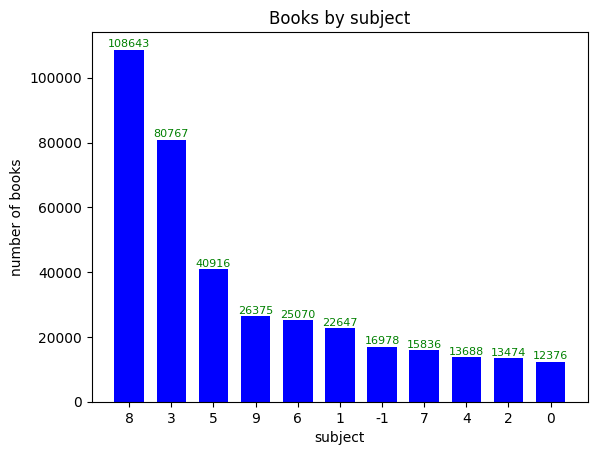

In [20]:
# plt.그래프타입함수(x축의 데이터, y축의 데이터) - 그래프 전체 설정을 속성 이용
# bar() 세로 막대 그래프 그리기 / bath() - 세로 막대
plt.bar(count_by_subject.index, count_by_subject.values, width=0.7, color="blue")

# 제목 세팅
plt.title("Books by subject")
plt.xlabel("subject")
plt.ylabel("number of books")
# 그래프 안에 데이터 표시
# item = (k, v)
for idx, val in count_by_subject.items():
  # annoteate(값, (위치:x, y)) - 값을 표시할 때 사용
  # xytext=(0, 2) - 데이터 표시 위치와 떨어진 정도 pt로 설정
  plt.annotate(val,(idx,val), xytext=(0, 2), textcoords="offset points",
              # horizontal alignment : 수평적인 정렬
               fontsize=8, ha="center", color="green")
plt.show()

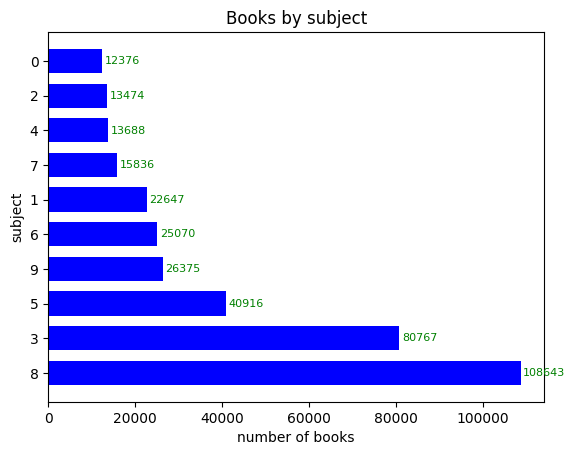

In [28]:
# 막대 그래프 그리기

# plt.그래프타입함수() - 그래프 전체 설정을 속성 이용
# bar(x축의 데이터, y축의 데이터) 세로 막대 그래프 그리기 / bath(y축의 데이터, x축의 데이터) - 가로 막대
# "-1" : 데이터로서의 의미가 없다. 제거 또는 "-1"이 아닌 데이터를 가지고 처리 (0~9)
count_by_subject = count_by_subject[count_by_subject.index != "-1"]
plt.barh(count_by_subject.index, count_by_subject.values, height=0.7, color="blue")

# 제목 세팅
plt.title("Books by subject")
plt.xlabel("number of books")
plt.ylabel("subject")
# 그래프 안에 데이터 표시
# item = (k, v)
for idx, val in count_by_subject.items():
  # annoteate(값, (위치:x, y)) - 값을 표시할 때 사용
  # xytext=(0, 2) - 데이터 표시 위치와 떨어진 정도 pt로 설정
  plt.annotate(val,(val, idx), xytext=(2, 0), textcoords="offset points",
               # horizontal alignment : 수평적인 정렬 , va - vertical alignment
               fontsize=8, va="center", color="green")

plt.show()